In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns

In [19]:
df = pd.read_csv('monthly_temperature_aomori_city.csv')
df.head()

,year,month,temperature
0,1882,1,-0.4
1,1882,2,-0.6
2,1882,3,1.2
3,1882,4,8.9
4,1882,5,12.1


In [20]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df.head()

,year,month,temperature,date
0,1882,1,-0.4,1882-01-01
1,1882,2,-0.6,1882-02-01
2,1882,3,1.2,1882-03-01
3,1882,4,8.9,1882-04-01
4,1882,5,12.1,1882-05-01


In [21]:
df = df.drop(['year', 'month'], axis=1)
df = df.set_index('date')
df.head()

,temperature
date,
1882-01-01,-0.4
1882-02-01,-0.6
1882-03-01,1.2
1882-04-01,8.9
1882-05-01,12.1


In [42]:
df.describe()

,temperature
count,1656.000000
mean,9.632428
std,8.725166
min,-5.700000
25%,1.100000
50%,9.950000
75%,17.600000
max,26.000000


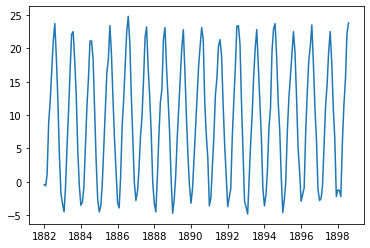

In [23]:
plt.plot(df[:200].temperature)

In [31]:
# function for time plot
def run_seq_plot(x, y, title, xlabel='time', ylabel='temp C'):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.5)

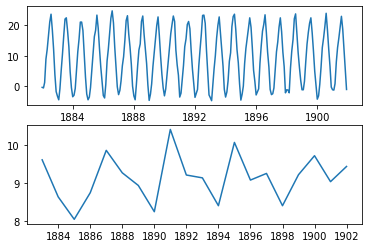

In [34]:
annual_temp = df.resample('A').mean()
fig, axes = plt.subplots(2, 1)
axes[0].plot(df[:240])
axes[1].plot(annual_temp[:20])

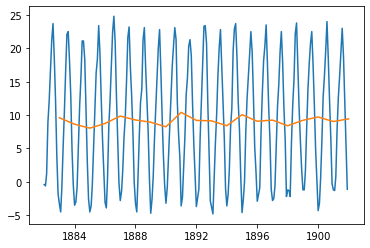

In [36]:
# overlay the yearly temp on monthly temp
plt.plot(df[:240])
plt.plot(annual_temp[:20])

<AxesSubplot:xlabel='date', ylabel='temperature'>

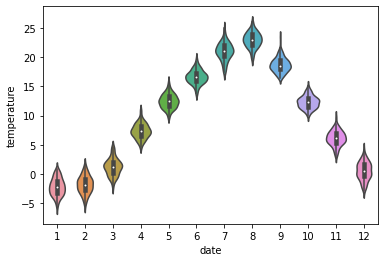

In [43]:
sns.violinplot(x=df.index.month, y=df.temperature)

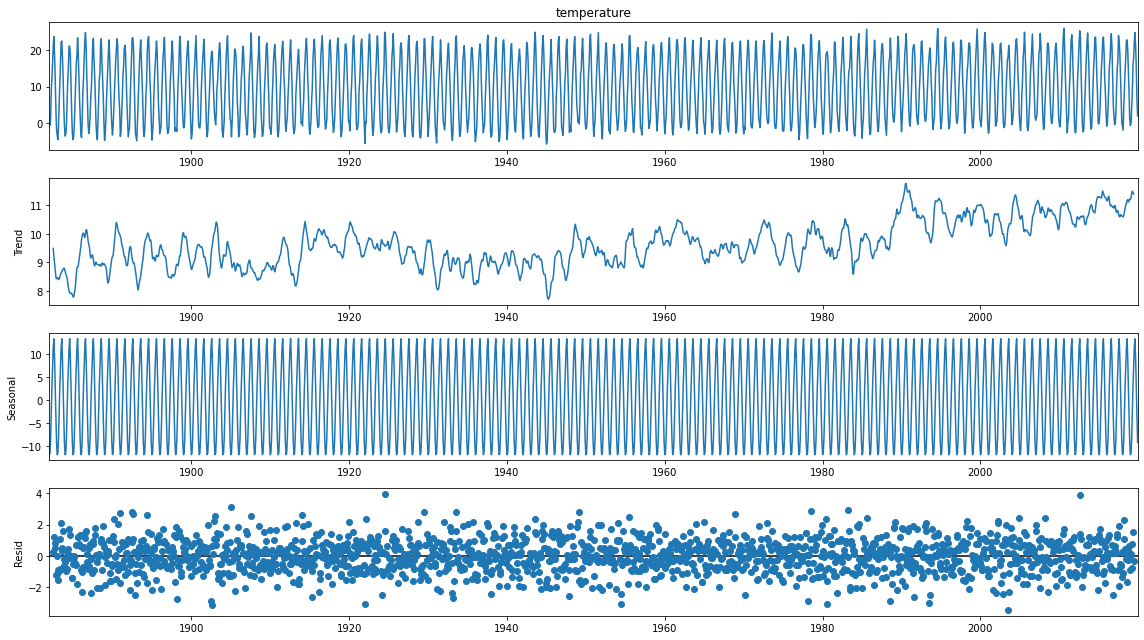

In [45]:
decompostion = sm.tsa.seasonal_decompose(df.temperature, model='additive')
plt.rcParams['figure.figsize'] = [16, 9]
fig = decompostion.plot()


In [52]:
# define dickey-fuller test function 
# Null is a unit root is present(non-stationary), reject null means stationary
import statsmodels.tsa.stattools as ts

ts.adfuller(df.temperature)
# p value of 0.04 allows us to reject null at 5% conf

(-2.9363970606661933,
 0.04127628081756358,
 23,
 1632,
 {'1%': -3.434363244707632,
  '5%': -2.8633126160514863,
  '10%': -2.567713701716287},
 5369.887182800725)

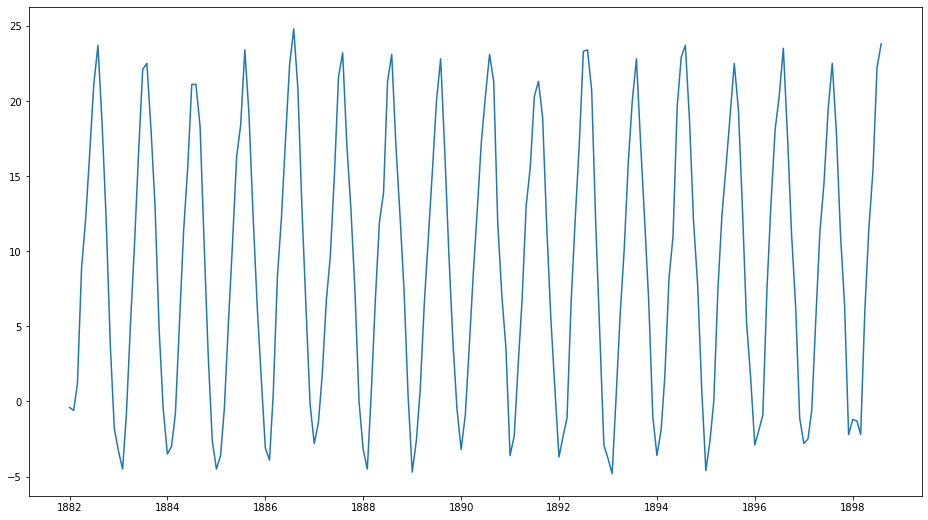

In [54]:
plt.plot(df[:200])


In [ ]:
plt.xticks(np.linspace(1,51,11, dtype='int'))